In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Read

In [18]:
# Memuat dataset
kendaraan_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET KENDARAAN.xlsx')
pemilik_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET PEMILIK KENDARAAN.xlsx')
ulasan_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET ULASAN.xlsx')
pengguna_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET PENGGUNA.xlsx')
transaksi_df = pd.read_excel('/content/drive/MyDrive/Capstone/dataset/DATASET RIWAYAT TRANSAKSI.xlsx')

## Dataset Kendaraan

In [20]:
kendaraan_df

,id_pemilik,jenis_kendaraan,id_kendaraan,merk_kendaraan,Transmisi,harga_per_hari,kapasitas
0,1001,mobil,MB1001A000,toyota avanza,Manual,500000,6
1,1001,mobil,MB1001A001,toyota alphard transformer,Automatic,2750000,5
2,1001,mobil,MB1001A002,daihatsu xenia,Manual,500000,6
3,1001,mobil,MB1001A003,daihatsu luxio,Manual,500000,6
4,1001,mobil,MB1001A004,toyota innova reborn,Manual,700000,7
...,...,...,...,...,...,...,...
274,1020,mobil,MB1020A056,toyota avanza facelift,Automatic,650000,6
275,1020,mobil,MB1020A020,grand innova,Automatic,700000,7
276,1020,mobil,MB1020A004,toyota innova reborn,Automatic,800000,6
277,1020,mobil,MB1020A021,innova zenix,Automatic,1200000,6


In [62]:
kendaraan_df.describe ()

,id_pemilik,harga_per_hari,kapasitas
count,279.000000,2.790000e+02,279.000000
mean,1010.501792,5.598925e+05,7.677419
std,6.405300,5.651717e+05,5.463077
min,1001.000000,5.000000e+04,2.000000
25%,1005.000000,2.500000e+05,5.000000
50%,1010.000000,4.000000e+05,7.000000
75%,1016.000000,7.000000e+05,8.000000
max,1021.000000,4.000000e+06,50.000000


## Dataset Pemilik Kendaraan

In [19]:
pemilik_df

,id_pemilik,nama_pemilik,alamat_pemilik,Usia,nmr_tlp_pemilik,email_pemilik,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1001,almoreno,"Jl. Pasarkembang, Stasiun Tugu, Yogyakarta 55272",30,82133345351,almorenotransport@gmail.com,NaN,NaN,NaN,NaN
1,1002,Giral,"jl. Imogiri timur 200B RT 033 RW 011 giwangan,...",28,82744340808,order.globaltransport@gmail.com,NaN,NaN,NaN,NaN
2,1003,novie,"jl. Pundatewa, mantup, baturetno, kec.bangunta...",25,81328374849,malioborotour.info@gmail.com,NaN,NaN,NaN,NaN
3,1004,fetra transport,yogyakarta,32,81223355700,fetra@gmail.com,NaN,NaN,NaN,NaN
4,1005,ada kawan transport,yogyakarta,27,8122730707,adakawan@gmail.com,NaN,NaN,NaN,NaN
5,1006,abdi transport,yogyakarta,35,8122808844,abdi@gmail.com,NaN,NaN,NaN,NaN
6,1007,akar transpot,yogyakarta,28,816687447,akar@gmail.com,NaN,NaN,NaN,NaN
7,1008,nice tour,yogyakarta,29,81282002003,nicetour@gmail.com,NaN,NaN,NaN,NaN
8,1009,abadi transport,yogyakarta,31,85102613727,abadi@gmail.com,NaN,NaN,NaN,NaN
9,1010,alvian trans,yogyakarta,23,82326605264,alvian@gmail.com,NaN,NaN,NaN,NaN


## Dataset Ulasan

In [21]:
ulasan_df

,id_ulasan,id_pemilik,id_pengguna,nama,tanggal,rating,ulasan,status
0,U001,1001,R01,Budi Santoso,2023-05-22,5,Pelayanan sangat baik dan mobil dalam kondisi ...,Selesai
1,U002,1001,R02,Siti Aisyah,2023-06-15,4,"Mobil sesuai deskripsi, proses cepat",Selesai
2,U003,1001,R03,Agus Prayitno,2023-07-10,3,Kendaraan agak kotor saat diambil,Selesai
3,U004,1001,R04,Dinda Pertiwi,2023-08-01,2,"Proses pengembalian lambat, perlu perbaikan",Selesai
4,U005,1001,R05,Andi Setiawan,2023-08-15,1,"Mobil rusak di tengah jalan, sangat mengecewakan",Dibatalkan
...,...,...,...,...,...,...,...,...
295,U296,1020,R296,Dewi Susanti,2023-06-22,5,Proses pemesanan mobil yang mudah,Selesai
296,U297,1020,R297,Dian Rahmawati,2023-06-30,4,Mobil dalam kondisi bersih dan terawat,Selesai
297,U298,1020,R298,Dewi Kurniawan,2023-07-05,5,Mobil dalam kondisi sangat baik dan nyaman,Selesai
298,U299,1020,R299,Susi Prasetyo,2023-07-15,4,Proses penyewaan mobil yang efisien,Selesai


In [63]:
ulasan_df.describe()

,id_pemilik,tanggal,rating
count,300.000000,300,300.000000
mean,1011.200000,2023-05-16 17:45:36,3.146667
min,1001.000000,1900-01-08 00:00:00,1.000000
25%,1005.000000,2023-05-23 12:00:00,2.000000
50%,1011.000000,2023-10-17 12:00:00,3.000000
75%,1018.000000,2024-03-10 12:00:00,4.000000
max,1021.000000,2024-06-16 00:00:00,5.000000
std,6.635266,NaN,1.404182


## Dataset Pengguna

In [22]:
pengguna_df

,renter_id,name,age,gender,address,phone_number,email,rental_history
0,R01,Budi Santoso,34,Laki-laki,Jakarta,81234567890,budi.santoso@gmail.com,MB1001A000
1,R02,Siti Aisyah,28,Perempuan,Bandung,82345678901,siti.aisyah@yahoo.com,MB1001A001
2,R03,Agus Prayitno,45,Laki-laki,Surabaya,83456789012,agus.prayitno@hotmail.com,MB1001A002
3,R04,Dinda Pertiwi,22,Perempuan,Yogyakarta,84567890123,dinda.pertiwi@outlook.com,MB1001A003
4,R05,Andi Setiawan,39,Laki-laki,Medan,85678901234,andi.setiawan@gmail.com,MB1001A004
...,...,...,...,...,...,...,...,...
295,R296,Dewi Susanti,36,Perempuan,Semarang,81604567895,dewi.susanti@yahoo.com,BS1020A009
296,R297,Dian Rahmawati,27,Perempuan,Malang,81714567896,dian.rahmawati@hotmail.com,BS1020A009
297,R298,Dewi Kurniawan,32,Perempuan,Denpasar,81824567897,dewi.kurniawan@gmail.com,BS1020A009
298,R299,Susi Prasetyo,34,Perempuan,Makassar,81934567898,susi.prasetyo@gmail.com,BS1020A009


## Dataset Riwayat Transaksi

In [23]:
transaksi_df

,id_transaksi,id_pemilik,id_pengguna,tanggal_sewa,tanggal_kembali,durasi_sewa,harga,total_sewa,metode_pembayaran
0,T001,1001,R01,2024-01-01,2024-01-02,1,500000,500000,tunai
1,T002,1001,R02,2023-01-01,2023-01-03,2,2750000,5500000,kartu kredit
2,T003,1001,R03,2023-01-05,2023-01-08,3,500000,1500000,transfer bank
3,T004,1001,R04,2023-01-12,2023-01-15,3,500000,1500000,transfer bank
4,T005,1001,R05,2023-01-20,2023-01-25,5,700000,3500000,transfer bank
...,...,...,...,...,...,...,...,...,...
295,T296,1020,R296,2023-06-18,2023-06-22,4,1000000,4000000,kartu kredit
296,T297,1020,R297,2023-06-25,2023-06-30,5,1200000,6000000,kartu kredit
297,T298,1020,R298,2023-07-01,2023-07-05,4,1200000,4800000,kartu kredit
298,T299,1020,R299,2023-07-10,2023-07-15,5,1200000,6000000,kartu kredit


# Sistem Rekomendasi collaborative filtering items

## Exploratory Data Analysis

In [24]:
import pandas as pd

# Menampilkan beberapa baris pertama dari dataset
print("Dataset sebelum konversi tanggal:")
print(ulasan_df.head())

# Konversi kolom 'tanggal' ke format timestamp
ulasan_df['tanggal'] = pd.to_datetime(ulasan_df['tanggal'], format='%d/%m/%Y')

# Menampilkan beberapa baris pertama dari dataset setelah konversi
print("Dataset setelah konversi tanggal:")
print(ulasan_df.head())

# Menyimpan dataset yang sudah dikonversi ke bentuk baru jika diperlukan
ulasan_df.to_excel('/content/drive/MyDrive/Capstone/dataset/DATASET_ULASAN_UPDATED.xlsx', index=False)


Dataset sebelum konversi tanggal:
  id_ulasan  id_pemilik id_pengguna           nama    tanggal  rating  \
0      U001        1001         R01   Budi Santoso 2023-05-22       5   
1      U002        1001         R02    Siti Aisyah 2023-06-15       4   
2      U003        1001         R03  Agus Prayitno 2023-07-10       3   
3      U004        1001         R04  Dinda Pertiwi 2023-08-01       2   
4      U005        1001         R05  Andi Setiawan 2023-08-15       1   

                                              ulasan      status  
0  Pelayanan sangat baik dan mobil dalam kondisi ...     Selesai  
1               Mobil sesuai deskripsi, proses cepat     Selesai  
2                  Kendaraan agak kotor saat diambil     Selesai  
3        Proses pengembalian lambat, perlu perbaikan     Selesai  
4   Mobil rusak di tengah jalan, sangat mengecewakan  Dibatalkan  
Dataset setelah konversi tanggal:
  id_ulasan  id_pemilik id_pengguna           nama    tanggal  rating  \
0      U001       

In [5]:
ulasan_df.describe()

,id_pemilik,tanggal,rating
count,300.000000,300,300.000000
mean,1011.200000,2023-05-16 17:45:36,3.146667
min,1001.000000,1900-01-08 00:00:00,1.000000
25%,1005.000000,2023-05-23 12:00:00,2.000000
50%,1011.000000,2023-10-17 12:00:00,3.000000
75%,1018.000000,2024-03-10 12:00:00,4.000000
max,1021.000000,2024-06-16 00:00:00,5.000000
std,6.635266,NaN,1.404182


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Menampilkan informasi
print("Jumlah Ratings: {:,}".format(ulasan_df.shape[0]))
print("Jenis Kolom Yang Tersedia: {}".format(np.array2string(ulasan_df.columns.values)))
print("Jumlah User: {:,}".format(len(ulasan_df.id_pengguna.unique())))
print("Jumlah Pemilik: {:,}".format(len(ulasan_df.id_pemilik.unique())))


Jumlah Ratings: 300
Jenis Kolom Yang Tersedia: ['id_ulasan' 'id_pemilik' 'id_pengguna' 'nama' 'tanggal' 'rating' 'ulasan'
 'status']
Jumlah User: 300
Jumlah Pemilik: 21


<ipython-input-29-cabe39430410>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_by_date.timestamp = pd.to_datetime(ulasan_df.tanggal, unit="s")


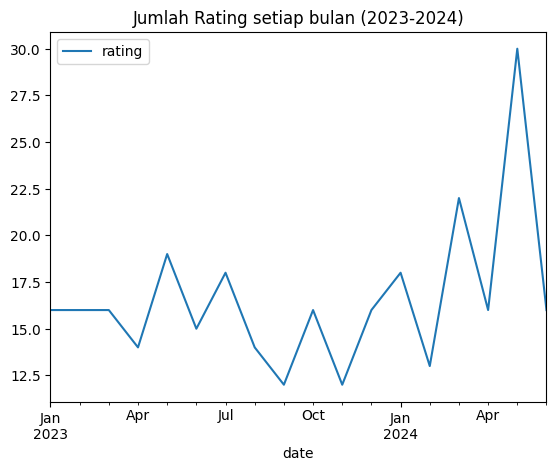

In [29]:
data_by_date = ulasan_df.copy()
data_by_date.timestamp = pd.to_datetime(ulasan_df.tanggal, unit="s")
data_by_date = data_by_date.sort_values(by="tanggal", ascending=False).reset_index(drop=True)

data_by_date["year"] = data_by_date.tanggal.dt.year
data_by_date["month"] = data_by_date.tanggal.dt.month
rating_by_year = data_by_date.groupby(["year", "month"])["rating"].count().reset_index()
rating_by_year["date"] = pd.to_datetime(rating_by_year["year"].astype("str") + "-" + rating_by_year["month"].astype("str") + "-1")


# Filter data berdasarkan tahun 2023 dan 2024
rating_by_year_filtered = rating_by_year[(rating_by_year["year"].isin([2023, 2024]))]

# Plot grafik
rating_by_year_filtered.plot(x="date", y="rating")
plt.title("Jumlah Rating setiap bulan (2023-2024)")
plt.show()


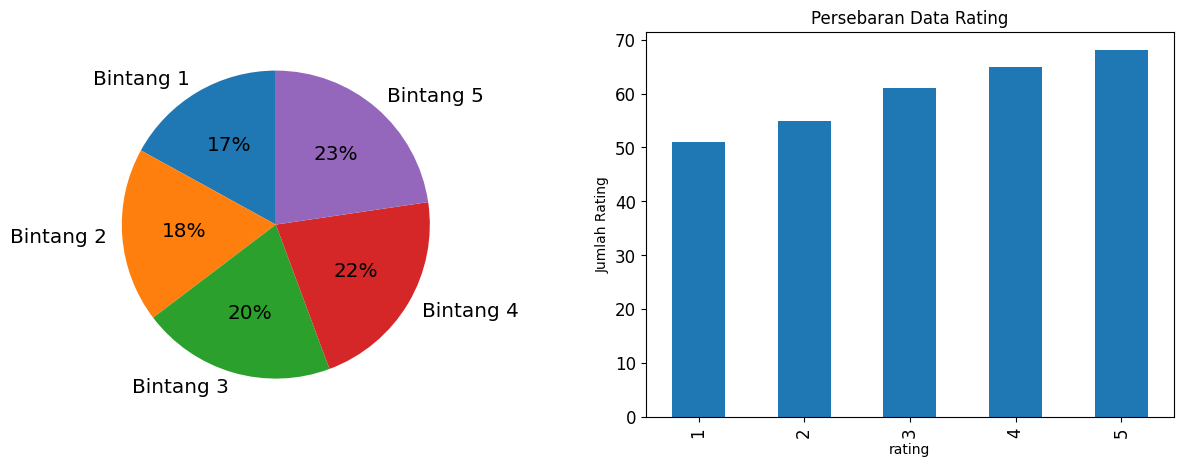

In [30]:

import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan rating
ratings = ulasan_df.groupby("rating").agg({"rating": "count"})

# Membuat subplots
figsize = (15, 5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

# Plot pie chart
ratings.plot.pie(ax=ax1, y="rating", legend=False, autopct='%1.f%%', startangle=90, fontsize="x-large",
                 labels=["Bintang 1", "Bintang 2", "Bintang 3", "Bintang 4", "Bintang 5"])
ax1.set_ylabel('')

# Plot bar chart
ratings.plot.bar(ax=ax2, fontsize="large")
ax2.set(ylabel="Jumlah Rating")
ax2.set(title="Persebaran Data Rating")
ax2.get_legend().remove()

plt.show()


In [31]:
# Mengelompokkan data berdasarkan rating
rating_by_product = ulasan_df.groupby("id_pemilik").agg({"id_pengguna": "count", "rating": "mean"}).rename(
    columns={"id_pengguna": "Jumlah Rating", "rating": "Rata-rata Rating"}).reset_index()

# Menampilkan produk teratas berdasarkan jumlah rating
print("Produk teratas berdasarkan jumlah rating:")
print(rating_by_product.sort_values(by="Jumlah Rating", ascending=False).reset_index(drop=True).head())


Produk teratas berdasarkan jumlah rating:
   id_pemilik  Jumlah Rating  Rata-rata Rating
0        1020             51          3.254902
1        1002             23          3.217391
2        1011             20          2.900000
3        1003             20          3.150000
4        1009             15          2.933333


## Model

In [14]:
!pip install -q tensorflow-recommenders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 3.3 MB/s eta 0:00:00


In [35]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
import pandas as pd


In [34]:
# Hanya menyimpan kolom yang relevan
relevant_columns = ['id_ulasan', 'id_pemilik', 'id_pengguna', 'nama', 'tanggal', 'rating', 'ulasan', 'status']
recent_prod = ulasan_df[relevant_columns]

# Mendapatkan ID pengguna dan ID produk yang unik
unique_userIds = recent_prod['id_pengguna'].astype(str).unique()
unique_productIds = recent_prod['id_pemilik'].astype(str).unique()
total_ratings = len(recent_prod.index)

# Membuat dataset TensorFlow dari data ulasan
ratings = tf.data.Dataset.from_tensor_slices({
    "id_pengguna": tf.cast(recent_prod['id_pengguna'].astype(str).values, tf.string),
    "id_pemilik": tf.cast(recent_prod['id_pemilik'].astype(str).values, tf.string),
    "rating": tf.cast(recent_prod['rating'].values, tf.float32)
})


In [36]:
# Mengacak dan membagi dataset menjadi set pelatihan dan pengujian
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(int(total_ratings * 0.8))
test = shuffled.skip(int(total_ratings * 0.8)).take(int(total_ratings * 0.2))


In [52]:
# Definisi model ranking
class RankingModel(tf.keras.Model):
    def __init__(self, unique_userIds, unique_productIds):
        super().__init__()
        embedding_dimension = 32

        self.user_embeddings = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_userIds, mask_token=None),
            tf.keras.layers.Embedding(len(unique_userIds)+1, embedding_dimension)
        ])

        self.product_embeddings = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_productIds, mask_token=None),
            tf.keras.layers.Embedding(len(unique_productIds)+1, embedding_dimension)
        ])

        self.ratings = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1)
        ])

    def call(self, id_pengguna, id_pemilik):
        user_embeddings = self.user_embeddings(id_pengguna)
        product_embeddings = self.product_embeddings(id_pemilik)
        return self.ratings(tf.concat([user_embeddings, product_embeddings], axis=1))

# Definisi model MyRent
class MyRentModel(tfrs.models.Model):
    def __init__(self, unique_userIds, unique_productIds):
        super().__init__()
        self.ranking_model = RankingModel(unique_userIds, unique_productIds)
        self.task = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
        )

    def compute_loss(self, features, training=False):
        rating_predictions = self.ranking_model(features["id_pengguna"], features["id_pemilik"])
        return self.task(labels=features["rating"], predictions=rating_predictions)

# Membuat model dengan kelas unik yang telah diperoleh
model = MyRentModel(unique_userIds, unique_productIds)

In [53]:
# Mengkompilasi dan melatih model
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01))

cached_train = train.shuffle(100_000).batch(32).cache()
cached_test = test.batch(32).cache()

history = model.fit(cached_train, epochs=20)

# Mengevaluasi model pada data pengujian
evaluation = model.evaluate(cached_test)
print(f"RMSE on test data: {evaluation[1]}")
print(f"MAE on test data: {evaluation[2]}")

Epoch 1/20
8/8 [==============================] - 1s 4ms/step - root_mean_squared_error: 3.2899 - mean_absolute_error: 2.9835 - loss: 10.9309 - regularization_loss: 0.0000e+00 - total_loss: 10.9309
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - root_mean_squared_error: 2.6986 - mean_absolute_error: 2.3106 - loss: 7.2086 - regularization_loss: 0.0000e+00 - total_loss: 7.2086
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - root_mean_squared_error: 1.9270 - mean_absolute_error: 1.5828 - loss: 3.5922 - regularization_loss: 0.0000e+00 - total_loss: 3.5922
Epoch 4/20
8/8 [==============================] - 0s 3ms/step - root_mean_squared_error: 1.4730 - mean_absolute_error: 1.2571 - loss: 2.0975 - regularization_loss: 0.0000e+00 - total_loss: 2.0975
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - root_mean_squared_error: 1.4072 - mean_absolute_error: 1.1999 - loss: 1.9001 - regularization_loss: 0.0000e+00 - total_loss: 1.9001
Epoch 6/20
8/8 [==

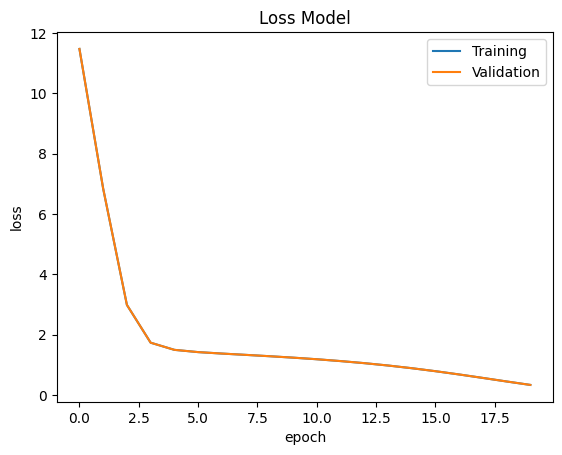

In [54]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['total_loss'], label='Validation')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [60]:
# Memilih pengguna acak untuk mendapatkan rekomendasi
user_rand = unique_userIds[123]
test_rating = {}
for m in test.take(10):
    product_id = m["id_pemilik"].numpy()
    test_rating[product_id] = model.ranking_model(tf.convert_to_tensor([user_rand]), tf.convert_to_tensor([product_id]))

print("10 mobil teratas yang direkomendasikan untuk pengguna {}: ".format(user_rand))
for m in sorted(test_rating, key=test_rating.get, reverse=True):
    print(m.decode())

10 mobil teratas yang direkomendasikan untuk pengguna R124: 
1013
1002
1019
1003
1018
1020
1008
1015




1. **Representasi Pengguna dan Produk**:
   - **Embeddings**: Model ini menggunakan embeddings untuk mengubah ID pengguna dan ID produk menjadi representasi vektor. Embeddings adalah cara untuk memetakan pengguna dan produk ke dalam ruang dimensi tinggi, di mana kesamaan antara pengguna dan produk dapat lebih mudah diukur.
   - Setiap pengguna dan produk diberikan vektor numerik (embedding) yang mewakili fitur mereka dalam ruang ini.

2. **Memahami Interaksi Pengguna-Produk**:
   - **Kombinasi Embeddings**: Model menggabungkan embedding pengguna dan produk. Kombinasi ini adalah representasi dari interaksi antara pengguna tertentu dan produk tertentu.
   - **Neural Network**: Gabungan embedding ini diteruskan melalui beberapa lapisan neural network yang berfungsi untuk memahami pola-pola kompleks dalam data dan memprediksi seberapa besar kemungkinan pengguna akan menyukai produk tersebut.

3. **Prediksi Rating**:
   - **Output**: Neural network memproduksi nilai numerik (rating prediksi) yang menunjukkan seberapa besar kemungkinan pengguna akan memberikan rating tinggi kepada produk tersebut.

4. **Pelatihan Model**:
   - **Data Pelatihan**: Model dilatih menggunakan data yang berisi rating aktual dari pengguna terhadap produk. Model belajar meminimalkan perbedaan antara rating yang diprediksi dan rating yang sebenarnya dengan menyesuaikan bobot-bobot dalam neural network.
   - **Optimisasi**: Proses optimisasi ini menggunakan algoritma Adagrad untuk memperbarui bobot berdasarkan seberapa besar kesalahan prediksi.

5. **Rekomendasi Produk**:
   - **Pengguna Baru**: Setelah model dilatih, sistem dapat membuat prediksi untuk pengguna baru atau produk yang belum pernah dinilai oleh pengguna tersebut.
   - **Prediksi Rating**: Untuk memberikan rekomendasi, sistem memprediksi rating untuk berbagai produk yang belum dinilai oleh pengguna.
   - **Peringkat Produk**: Sistem menyusun produk berdasarkan rating prediksi dari yang tertinggi ke terendah dan merekomendasikan produk dengan rating tertinggi kepada pengguna.



In [61]:
import numpy as np

# Fungsi untuk menghitung Top-K Accuracy
def top_k_accuracy(model, test_data, k=10):
    hits = 0
    total = 0
    for batch in test_data.batch(32):
        user_ids = batch["id_pengguna"]
        true_item_ids = batch["id_pemilik"]
        true_ratings = batch["rating"]

        for user_id, true_item_id, true_rating in zip(user_ids, true_item_ids, true_ratings):
            predictions = []
            for product_id in unique_productIds:
                prediction = model.ranking_model(tf.convert_to_tensor([user_id]), tf.convert_to_tensor([product_id]))
                predictions.append((product_id, prediction.numpy()[0][0]))

            # Urutkan prediksi berdasarkan rating prediksi
            predictions.sort(key=lambda x: x[1], reverse=True)
            top_k_predictions = [x[0] for x in predictions[:k]]

            if true_item_id.numpy().decode() in top_k_predictions:
                hits += 1
            total += 1

    return hits / total

# Menghitung Top-10 Accuracy
top_k_acc = top_k_accuracy(model, test, k=10)
print(f"Top-10 Accuracy: {top_k_acc:.4f}")


Top-10 Accuracy: 0.6500
